In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
cb=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True)


Epoch 1/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2799 - loss: 2.7626

625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.3588 - loss: 1.9375 - val_accuracy: 0.4480 - val_loss: 1.5507
Epoch 2/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4912 - loss: 1.4323

625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.5057 - loss: 1.3932 - val_accuracy: 0.5108 - val_loss: 1.3809
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5700 - loss: 1.2227

625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5729 - loss: 1.2140 - val_accuracy: 0.5668 - val_loss: 1.2410
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6254 - loss: 1.0688

625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6250 - loss: 1.0713 - val_accuracy: 0.5919 - val_loss: 1.1810
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.6700 - loss: 0.9446 - val_accuracy: 0.5994 - val_loss: 1.1825
Epoch 6/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7153 - loss: 0.8241

625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7150 - loss: 0.8216 - val_accuracy: 0.6130 - val_loss: 1.1522
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7682 - loss: 0.6766

625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.7609 - loss: 0.6920 - val_accuracy: 0.6244 - val_loss: 1.1501
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8023 - loss: 0.5782 - val_accuracy: 0.6270 - val_loss: 1.1721
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.8454 - loss: 0.4575 - val_accuracy: 0.6219 - val_loss: 1.2383
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8837 - loss: 0.3517 - val_accuracy: 0.6249 - val_loss: 1.3420
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.9121 - loss: 0.2710 - val_accuracy: 0.6273 - val_loss: 1.4013
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9351 - loss: 0.2041 - val_accuracy: 0.6329 - val_loss: 1.5119
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9530 - loss: 0.1511 - val_accuracy: 0.6312 - val_loss: 1.6432
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9616 - loss: 0.1243 - val_ac

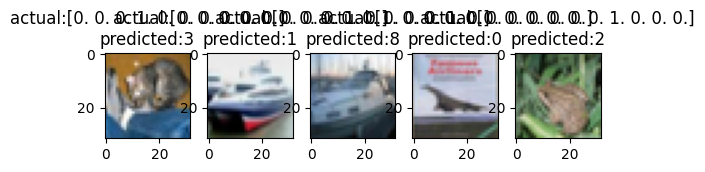

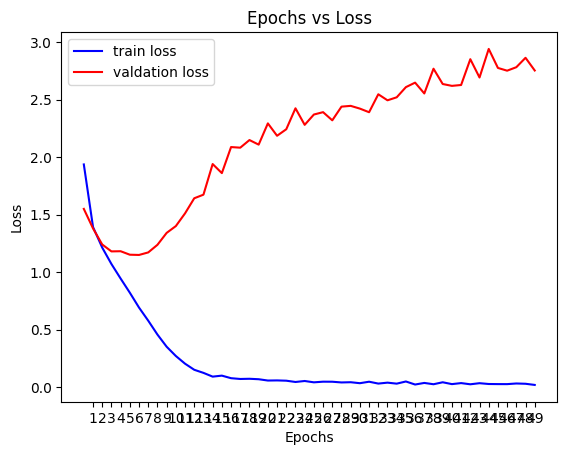

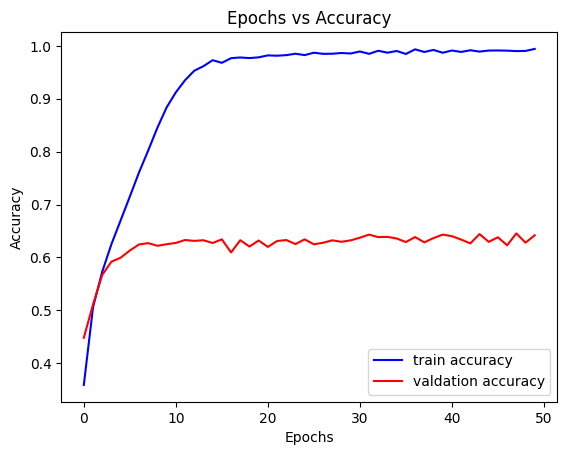

In [7]:
result=model.fit(x_train,y_train_cat,epochs=50,batch_size=64,validation_split=0.2,callbacks=[cb])
loss,test_accuracy=model.evaluate(x_test,y_test_cat)

predictions=model.predict(x_test)
predict_label=np.argmax(predictions,axis=1)
print(f"predicted label:{predict_label[1]}")

#Print the predicted image
for i in range(5):
    #print(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"actual:{y_test_cat[i]}\npredicted:{predict_label[i]}")
plt.show()
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()
